In [1]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dfs = pd.read_excel("alberta-post-secondary-graduate-earnings-by-field-of-study.xlsx", sheet_name=None)

In [3]:
dfs.keys()

dict_keys(['Information', 'Dictionary', 'One Year After Graduation', 'Two Years After Graduation', 'Five Years After Graduation', 'Ten Years After Graduation'])

In [71]:
TenYears = dfs['Ten Years After Graduation']
OneYear = dfs['One Year After Graduation']

In [72]:
TenYears = dfs['Ten Years After Graduation'].dropna()
OneYear = dfs['One Year After Graduation'].dropna()

In [6]:
"""
Data exploration ideas
take 1, 2, 5 years after graduation and predicting for 10 years?

"""

'\nData exploration ideas\ntake 1, 2, 5 years after graduation and predicting for 10 years?\n\n'

In [30]:
### Skip this data for now, don't manipulate the numbers in Field of Study
OneYear['Field of Study (CIP code)'] = OneYear['Field of Study (CIP code)'].str.replace('\d+', '')
OneYear['Field of Study (CIP code)'] = OneYear['Field of Study (CIP code)'].str.replace('.', '')
TenYears['Field of Study (CIP code)'] = OneYear['Field of Study (CIP code)'].str.replace('\d+', '')
TenYears['Field of Study (CIP code)'] = TenYears['Field of Study (CIP code)'].str.replace('.', '')

/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/davescott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
TenYears.head()

,Credential,Graduating Cohort,Field of Study (CIP code),Years After Graduation,Median Income,Cohort Size
0,Certificate,2005,00. Total (All Graduates),10,45900,2540
1,Certificate,2005,03. Natural resources and conservation,10,58000,30
2,Certificate,2005,11. Computer and information sciences and supp...,10,78600,50
3,Certificate,2005,12. Personal and culinary services,10,38000,40
4,Certificate,2005,13. Education,10,28800,150


In [74]:
OneYear.head()

,Credential,Graduating Cohort,Field of Study (CIP code),Years After Graduation,Median Income,Cohort Size
0,Certificate,2005,00. Total (All Graduates),1,35300.0,3860.0
1,Certificate,2006,00. Total (All Graduates),1,36300.0,4080.0
2,Certificate,2007,00. Total (All Graduates),1,37800.0,3620.0
3,Certificate,2008,00. Total (All Graduates),1,37700.0,3150.0
4,Certificate,2009,00. Total (All Graduates),1,35700.0,3520.0


In [10]:
# dataframe that includes the event (path) that each user went through
df_events = df.groupby('user')['event'].apply(
    lambda x: x.tolist()).reset_index()

NameError: name 'df' is not defined

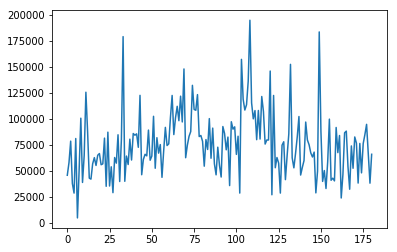

In [75]:
sns.lineplot(data=TenYears["Median Income"])

In [86]:
for item in TenYears.itertuples():
    if item[1] == "Overall (All Graduates)":
        TenYears.drop(item[0], inplace=True )
        
for item in TenYears.itertuples():
    if item[3] == "00. Total (All Graduates)":
        TenYears.drop(item[0], inplace=True )
        
for item in TenYears.itertuples():
    if item[3] == "00. Total":
        TenYears.drop(item[0], inplace=True )

In [87]:
TenYears.Field_of_Study.nunique()

33

In [78]:
TenYears = TenYears.rename(columns={"Field of Study (CIP code)": "Field_of_Study","Years After Graduation":"Years_After_Graduation"})

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

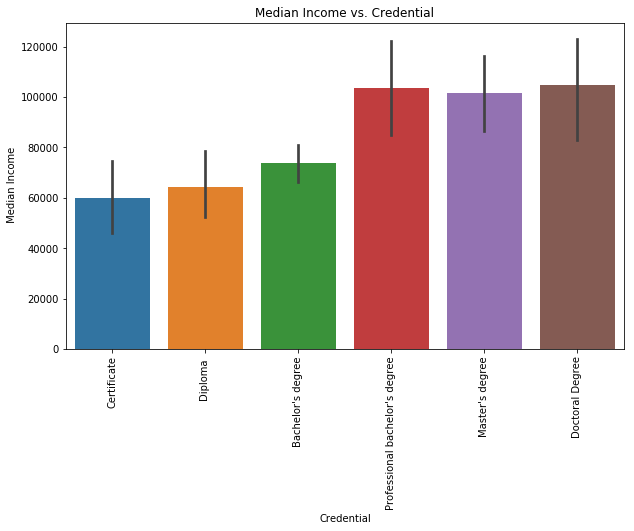

In [88]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Median Income vs. Credential")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=TenYears.Credential, y=TenYears["Median Income"])

# Add label for vertical axis
plt.ylabel(" Median Income")
plt.xticks(rotation=90)

In [95]:
TenYears = TenYears.sort_values(['Median Income']).reset_index(drop_index=True)

TypeError: reset_index() got an unexpected keyword argument 'drop_index'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

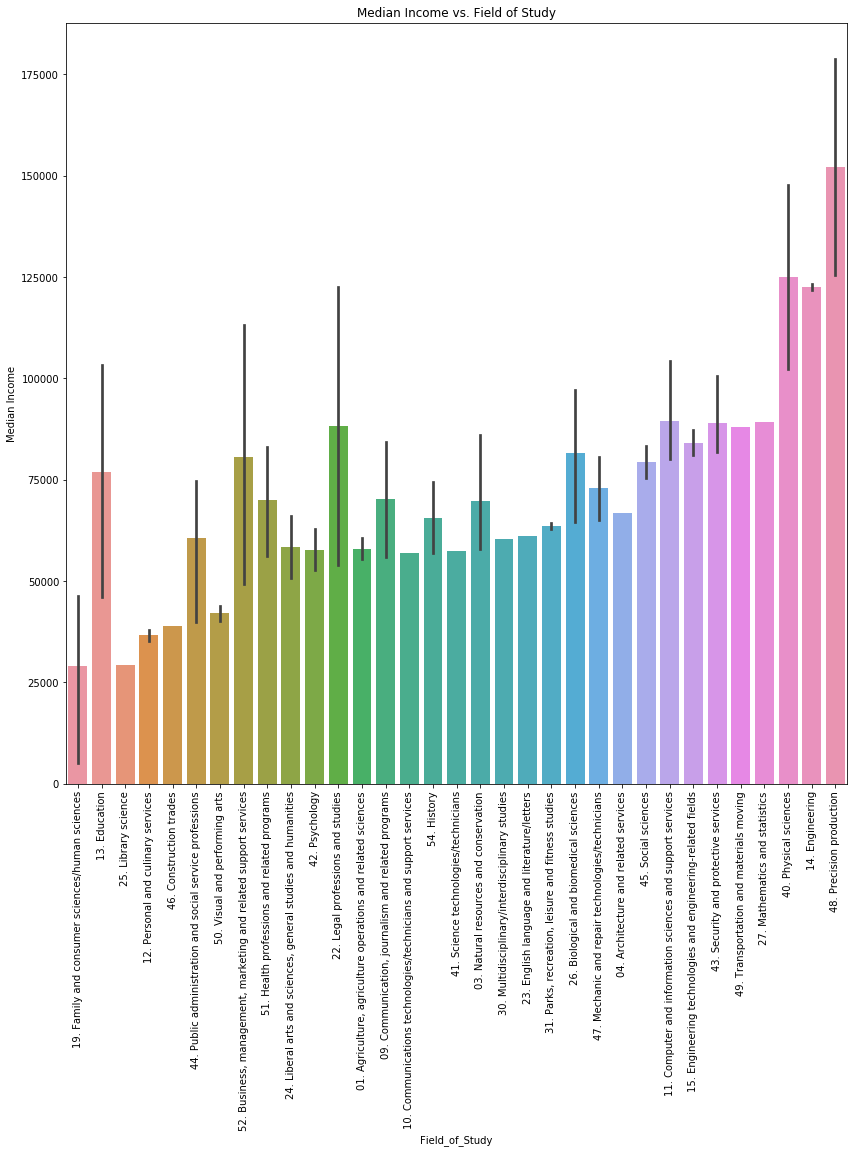

In [96]:
# Set the width and height of the figure
plt.figure(figsize=(14,14))

# Add title
plt.title("Median Income vs. Field of Study")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=TenYears.Field_of_Study, y=TenYears["Median Income"])

# Add label for vertical axis
plt.ylabel("Median Income")
plt.xticks(rotation=90)